In [1]:
#!/usr/bin/python
import sys
import math
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading convenient environment
# %pylab
%matplotlib inline

In [9]:
# Denomination of data folder
iloc='/home/maxime/dirac_work/dealammps/muc_3pbt_medium/'
floc='macroscale_log/load_deflection.csv'

In [10]:
latmp=os.listdir(iloc)
latmp

['macro_init',
 'nano_init',
 'medium_data',
 'attmpt1_ts1-40',
 'attmpt2_ts41-80',
 'attmpt3_ts81-138']

In [11]:
lattmpt=[]
for thing in latmp:
    if (thing.startswith("att")):
        lattmpt.append(thing)

In [12]:
dtf=pd.DataFrame()
fpdisp = 0.0
for thing in lattmpt:
    tloc=iloc+thing+"/"+floc
    print(tloc)
    df=pd.read_csv(tloc)
    df['imposed_displacement'] += fpdisp
    fpdisp=df['imposed_displacement'][-1:].values
#     df['imposed_displacement'] *= -1.0
    dtf=dtf.append(df)

/home/maxime/dirac_work/dealammps/muc_3pbt_medium/attmpt1_ts1-40/macroscale_log/load_deflection.csv
/home/maxime/dirac_work/dealammps/muc_3pbt_medium/attmpt2_ts41-80/macroscale_log/load_deflection.csv
/home/maxime/dirac_work/dealammps/muc_3pbt_medium/attmpt3_ts81-138/macroscale_log/load_deflection.csv


In [13]:
dtf

,timestep,time,imposed_displacement,applied_force
0,1,1,-0.00015,-2.289743
1,2,2,-0.00030,-4.579486
2,3,3,-0.00045,-6.869230
3,4,4,-0.00060,-9.158973
4,5,5,-0.00075,-11.448716
5,6,6,-0.00090,-13.738459
6,7,7,-0.00105,-16.028202
7,8,8,-0.00120,-18.317945
8,9,9,-0.00135,-20.607689
9,10,10,-0.00150,-22.897432


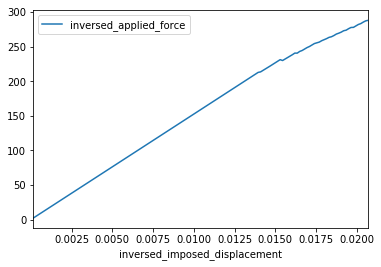

In [17]:
dtf['inversed_imposed_displacement'] = -1*dtf['imposed_displacement']
dtf['inversed_applied_force'] = -1*dtf['applied_force']
dtf.plot(x='inversed_imposed_displacement', y='inversed_applied_force')